# Exploratory Data Analysis

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import notebook_utilitis as nu
import matplotlib.pyplot as plt
import seaborn as sns
import get_data as gd

In [2]:
train_data = gd.load_intermidiate_training_data()
test_data = gd.load_intermidiate_test_data()

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
1,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
2,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
3,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
4,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,45.0,0,0,111428,26.5500,NaN,S


## Checking Duplicates

In [4]:
train_data[train_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [5]:
test_data[test_data.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


No duplicate Rows

----

## Data Types

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            571 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          161 non-null object
Embarked       710 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 12 columns):
PassengerId    179 non-null int64
Survived       179 non-null int64
Pclass         179 non-null int64
Name           179 non-null object
Sex            179 non-null object
Age            143 non-null float64
SibSp          179 non-null int64
Parch          179 non-null int64
Ticket         179 non-null object
Fare           179 non-null float64
Cabin          43 non-null object
Embarked       179 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 16.9+ KB


---

# Missing Values

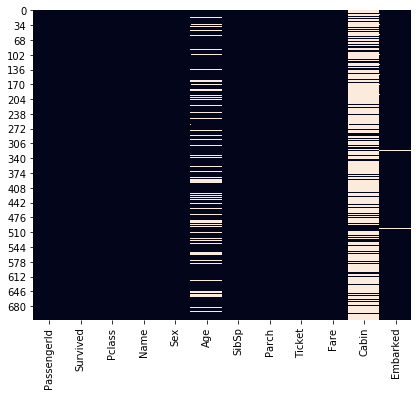

In [8]:
sns.heatmap(train_data.isnull(), cbar=False)
plt.subplots_adjust(right=1, top = 1.2)

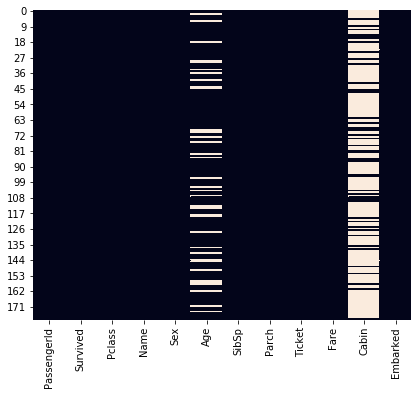

In [9]:
sns.heatmap(test_data.isnull(), cbar=False)
plt.subplots_adjust(right=1, top = 1.2)

Embarked too have few missing values in train set.

### Percentage of missing age values:

In [10]:
age_value_count = train_data['Age'].notnull().value_counts()
age_value_count # False indicates number of missing values

True     571
False    141
Name: Age, dtype: int64

In [11]:
age_value_count[0] / (age_value_count[0] + age_value_count[1]) * 100

19.803370786516854

Test Set:

In [12]:
age_value_count_test = test_data['Age'].notnull().value_counts()
age_value_count_test

True     143
False     36
Name: Age, dtype: int64

In [13]:
age_value_count_test[0] / (age_value_count_test[0] + age_value_count_test[1]) * 100

20.11173184357542

---

### Percentage of Cabin Missing Values

In [14]:
cabin_value_count = train_data['Cabin'].notnull().value_counts()
cabin_value_count

False    551
True     161
Name: Cabin, dtype: int64

In [15]:
cabin_value_count[0] / (cabin_value_count[0] + cabin_value_count[1]) * 100

77.3876404494382

- 77% is alot. I should probably not add Cabin in the model. As its alot to impute based on 33% observations. Imputation results would not be accurate
- I consider imputation for Age feature.

Test Set:

In [16]:
cabin_value_count_test = test_data['Cabin'].notnull().value_counts()
cabin_value_count_test

False    136
True      43
Name: Cabin, dtype: int64

In [17]:
cabin_value_count_test[0] / (cabin_value_count_test[0] + cabin_value_count_test[1]) * 100

75.97765363128491

Pretty much our data overall looks well stratified

----

# Categorical Feature

In [18]:
train_data.describe(include=[np.object])
# train_data.describe(include='object') # Same

,Name,Sex,Ticket,Cabin,Embarked
count,712,712,712,161,710
unique,712,2,557,118,3
top,"Marechal, Mr. Pierre",male,CA. 2343,C23 C25 C27,S
freq,1,461,6,4,509


In [19]:
test_data.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,179,179,179,43,179
unique,179,2,171,41,3
top,"Cacic, Mr. Luka",male,PC 17755,B96 B98,S
freq,1,116,2,2,135


---

### Embarked


In [20]:
train_data['Embarked'].value_counts()

S    509
C    140
Q     61
Name: Embarked, dtype: int64

In [21]:
test_data['Embarked'].value_counts()

S    135
C     28
Q     16
Name: Embarked, dtype: int64

----

### Sex

In [22]:
train_data['Sex'].value_counts() 

male      461
female    251
Name: Sex, dtype: int64

In [23]:
test_data['Sex'].value_counts()

male      116
female     63
Name: Sex, dtype: int64

Name and Tickets are insignificant. <br>
Cabin 118 out of 161 unique categories. Does not look promising. <br>

----

### Survived is also a categorical Feature.



In [24]:
survived_count_train = train_data['Survived'].value_counts() # 0 Not Servived and 1  Survived
survived_count_train

0    438
1    274
Name: Survived, dtype: int64

##### Percentage of People Survived

In [25]:
survived_count_train[1] / np.sum(survived_count_train) * 100

38.48314606741573

Difference is High, and training data is not huge. Hence, Accuracy can not be used as a Performance Measure. ( as we have higher chances predicting random guess as not survived to be correct). 

Either we can do stratified on the basis of Survived response feature, then we can use accuracy. <br>
Or we go as it is and choose different evaluation metric. 

------

### PClass 

In [26]:
pclass_count_train = train_data['Pclass'].value_counts() # 0 Not Servived and 1  Survived
pclass_count_train

3    390
1    172
2    150
Name: Pclass, dtype: int64

##### Percentage of People in Various Classes

In [27]:
pclass_count_train / np.sum(pclass_count_train) * 100

3    54.775281
1    24.157303
2    21.067416
Name: Pclass, dtype: float64

-----------------------

## Tickets

In [28]:
train_data['Ticket'].value_counts()

CA. 2343      6
CA 2144       5
347082        5
1601          5
382652        5
             ..
C.A. 18723    1
244361        1
350052        1
323951        1
349247        1
Name: Ticket, Length: 557, dtype: int64

Seems insignificant

-----


# Numerical Features

In [29]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,571.000000,712.000000,712.000000,712.000000
mean,444.667135,0.384831,2.306180,29.532119,0.529494,0.383427,31.761188
std,254.363368,0.486897,0.834601,14.599606,1.115913,0.804632,45.942669
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,226.750000,0.000000,2.000000,20.750000,0.000000,0.000000,7.895800
50%,441.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.456250
75%,664.750000,1.000000,3.000000,38.000000,1.000000,0.000000,30.548950
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Checking Distributions of Features

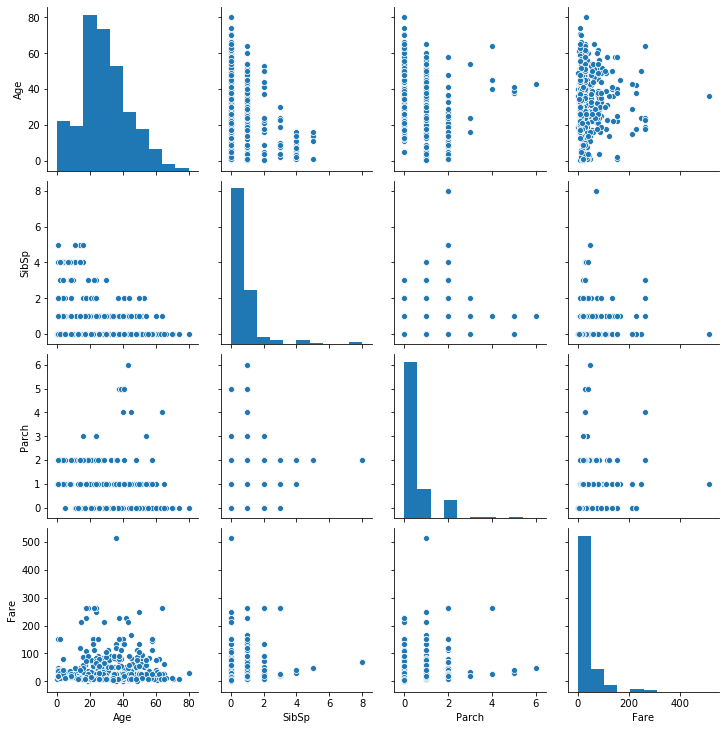

In [30]:
drop_features = ['PassengerId','Survived','Pclass']
sns.pairplot(train_data.drop(drop_features,axis=1))

Fare , Parch, SibSp are right skewed.

----

### Checking Multi co-linearity and Co-relation

In [31]:
irelavent_features = ['PassengerId','Pclass']

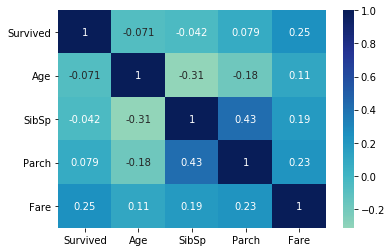

In [32]:
sns.heatmap(train_data.drop(irelavent_features, axis=1).corr(),center=0,annot=True,cmap="YlGnBu")

All numerical Predictors have co-linearity less than 0.43. <br>
Siblings/sPouse and parent/children number have co-linearity of 0.43. ( We can combine them and then check again the co-linearity) <br>

On the other hand: repose variable survived have very less correlation with features. (we expected that to be large)

Furthermore: Use Variance Inflation Factor for this purpose. <br>
Check co-relation again after transforming categorical features is data prep phase.

---

### Age

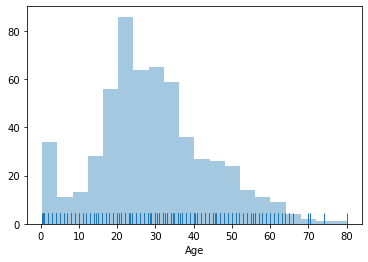

In [33]:
sns.distplot(train_data['Age'],  rug=True, kde=False)

Uniform Distribution with wider tale

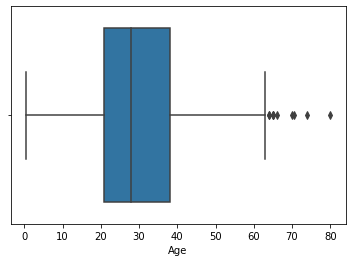

In [34]:
sns.boxplot(train_data['Age'])

There few Seniors above 62 years of age

Checking if age is entered 0:

In [35]:
train_data[train_data['Age'] == 0 ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


No age is zero.


Age upto 8:

In [36]:
age_upto_8 = train_data[np.logical_and(train_data['Age'] >= 0, train_data['Age'] <= 8)]

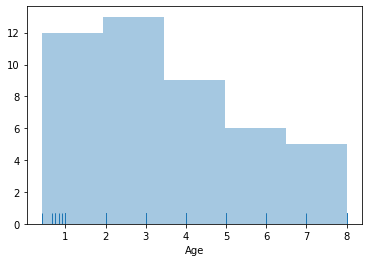

In [37]:
sns.distplot(age_upto_8['Age'],rug=True, kde=False)

Age up to 1 seems to have few outliers.

Deal with age outliers?

Data Prep Phase

---

### Fare

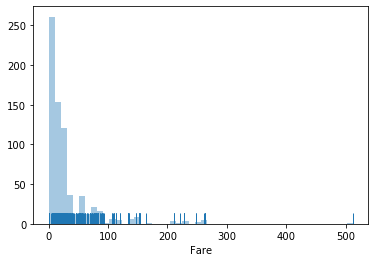

In [38]:
sns.distplot(train_data['Fare'],  rug=True, kde=False)

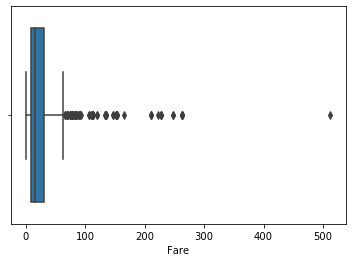

In [39]:
sns.boxplot(train_data['Fare'])

There are less people Who paid more then 70$ <br>

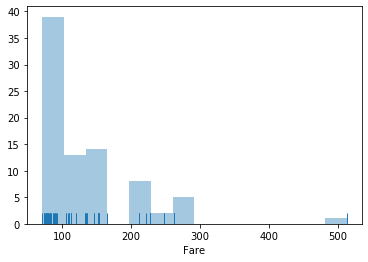

In [40]:
fair_more_then_70 = train_data[train_data['Fare'] > 70]

sns.distplot(fair_more_then_70['Fare'],rug=True, kde=False)

There is one crazy person who paid around 500$. He survived too.

In [41]:
train_data[train_data['Fare'] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
542,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C


Promising Type(S) Transformation for this variable: 
Will add later

---

### SibSp - Siblings / Spouse

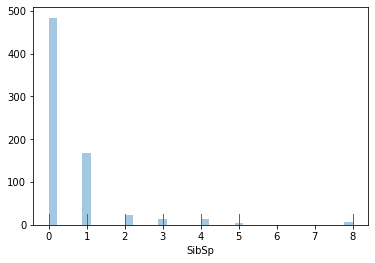

In [42]:
sns.distplot(train_data['SibSp'],  rug=True, kde=False)

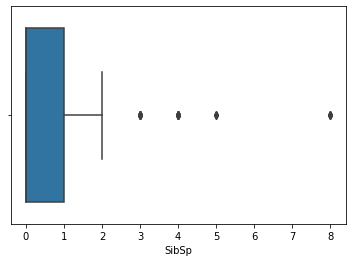

In [43]:
sns.boxplot(train_data['SibSp'])

Most people have less then 2 Siblings or spouse

Promising Type(S) Transformation for this variable: 
Will add later

###  Parch - Parent / Child

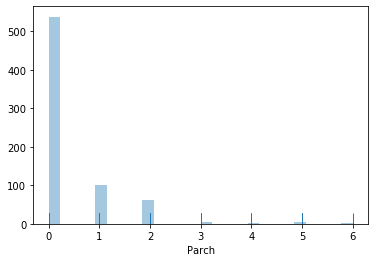

In [44]:
sns.distplot(train_data['Parch'], kde=False, rug=True)

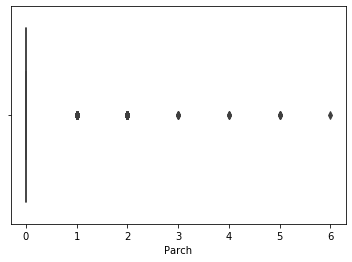

In [45]:
sns.boxplot(train_data['Parch'])

Majority of people do not have any parent or child aboard.

Promising Type(S) Transformation for this variable: 
Will add later

----